First step is to import the libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plots and graphs
import seaborn as sns # also useful for making some plots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [43]:
# loading the csv data to a pandas Datframe

gold_data = pd.read_csv('/content/gld_price_data.csv')


In [44]:
# print first 5 rows in the data frame

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [45]:
# laft five rows of data frame

In [46]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [47]:
# large dataset it is so it's good

In [48]:
# number of rows and column

In [49]:
gold_data.shape

(2290, 6)

In [50]:
#getting some basic information about the data

In [51]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [52]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [53]:
# stastical measures of the data

In [54]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :
1]  positive correlation (directly correlation)
2] negative correlation(indirectly proprtion as a = -a)

In [65]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [66]:
correlation = gold_data.corr()


In [67]:
# constructing the heapmap to understan the coorelation

<Axes: >

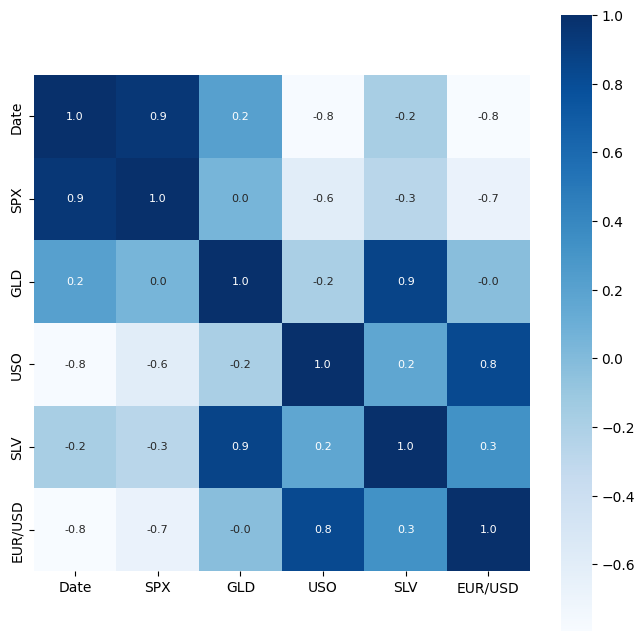

In [68]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot= True, annot_kws={'size': 8}, cmap = 'Blues')

In [69]:
# correlation values of GOLD

print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-70-e8511c1a0a22>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green' )


<Axes: xlabel='GLD', ylabel='Density'>

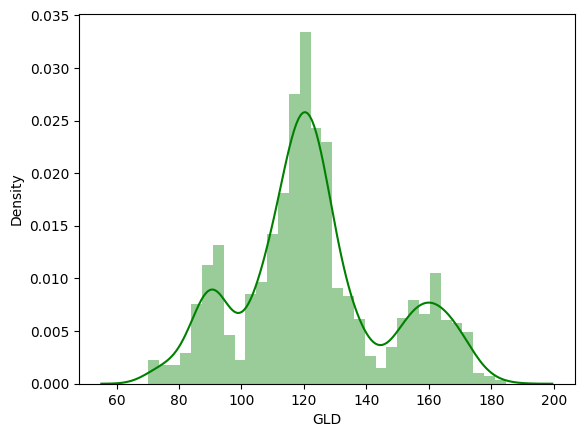

In [70]:
#checking the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green' )

Splitting the features and target

In [73]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


Splitting into train and test data

In [74]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model training:
Random Forest Regression

In [77]:
regressor = RandomForestRegressor(n_estimators = 100)

In [78]:
# training the model

regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evalution

In [79]:
# prediction on Test Data

In [80]:
test_data_prediction = regressor.predict(x_test)

In [81]:
print(test_data_prediction)

[168.45789933  82.19519967 115.87419979 127.50720049 120.88310156
 154.74909741 150.02319896 126.21220043 117.3966989  125.94420107
 116.82640088 172.12200084 141.6536985  167.49329817 115.03690006
 117.69640059 139.05860288 170.44260136 159.66200298 160.83589898
 155.1883001  125.44810024 175.72220028 156.86650393 125.11810035
  94.03189996  77.89719999 120.58060033 119.17129988 167.41939948
  88.16490066 125.37659997  91.05930074 117.67740022 121.14409927
 136.30320118 115.65940092 115.38320086 145.95129904 107.36510082
 104.17740256  87.09929781 126.53390043 117.84460011 153.43439912
 119.66670001 108.45619958 108.03849799  93.30440049 127.26769733
  74.98880039 113.66019926 121.38049986 111.34649944 118.88659891
 120.88939945 159.580599   167.8627011  146.82159652  85.8421986
  94.17060032  86.88639901  90.49090013 118.90480057 126.39630113
 127.56180027 169.46749976 122.3145992  117.37309883  98.7852002
 167.21830039 142.9519982  131.67450307 121.10320174 121.09719971
 119.9285007

In [82]:
# R squared error

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9889155617317096


Compare the Actual values and Predicted values in a plot

In [84]:
y_test = list(y_test)

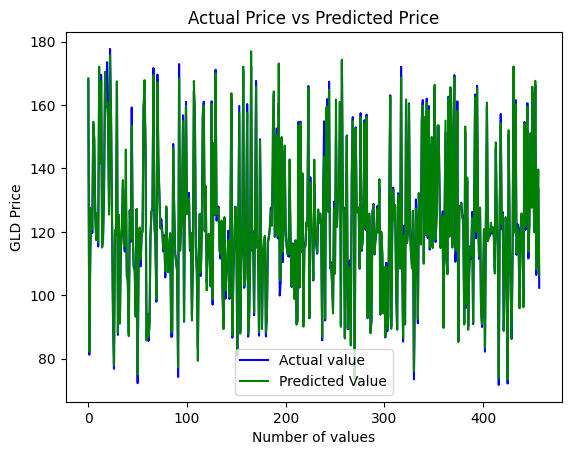

In [86]:
plt.plot(y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()